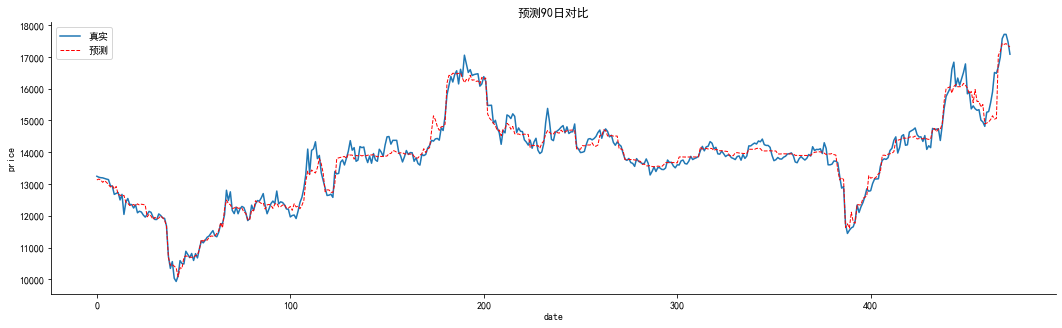

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import datetime 


origin_data = pd.read_csv('all_features.csv')
origin_data['cal_date'] = origin_data['cal_date'].apply(lambda x : str(x))
origin_data = origin_data[['ppi_yoy','ppi_mom','ppi_accu','nt_val','town_val','cnt_val','m0','m1','m2','gdp','pi','si','ti','settle','vol','amount','oi','close']]
train_data = origin_data



# Assign the y <- Prediction variable, and X <- Predicting features
# X is assigned 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
features = ['ppi_yoy', 'ppi_mom', 'ppi_accu', 'nt_val', 'town_val','cnt_val', 'm0', 'm1', 'm2', 'gdp', 'pi', 'si', 'ti', 'settle', 'vol', 'amount', 'oi']
X = train_data[features][:-90]
y = train_data.close[90:]
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.33, random_state=0)
model = RandomForestRegressor(random_state=1,max_features=5,n_estimators=200,max_depth=10)
model.fit(X_train, y_train)



y_test = y_test.sort_index()
X_test = X_test.sort_index()
preds = model.predict(X_test)

# 可视化
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(num=3, figsize=(18, 5))

plt.plot( list(y_test),label='真实')
plt.plot( preds, color='red', linewidth=1.0, linestyle='--',label='预测')
# 添加图例要在线上加label 然后配合legend
plt.legend(loc='upper left')
plt.title('预测90日对比')

plt.xlabel('date')
plt.ylabel('price')

# 让右边框和上边框消失
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


hour = ''.join(''.join(str(datetime.datetime.now())[:13].split(' ')).split('-'))
plt.savefig('./训练集上进行测试'+hour+'.jpg')
plt.show()

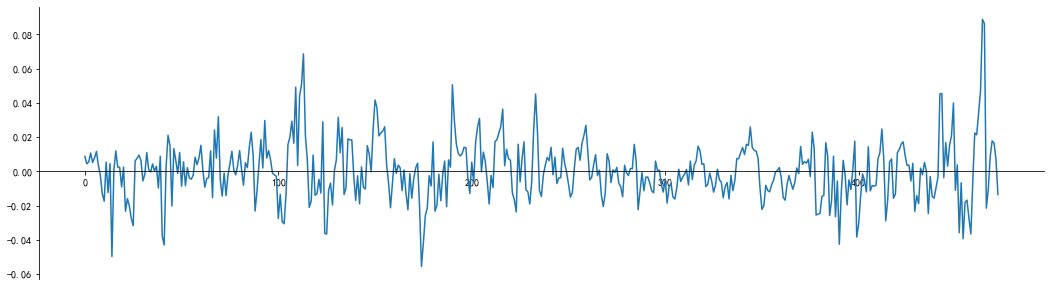

In [41]:
'''
求两列表差值
input:  a:list
        b:list
output: res:list
'''
def d_value(list1,list2):
    res = []
    n = len(list1)
    for i in range(0,n):
        res.append(list1[i] - list2[i])
    return res

def div_value(list1,list2):
    res = []
    n = len(list1)
    for i in range(0,n):
        res.append(list1[i]/list2[i])
    return res

error = d_value(list(y_test),preds)
error = div_value(error,list(y_test))

# new_ticks = np.linspace(-1500, 3000, 20)

plt.figure(num=1,figsize=(18,5))
plt.plot(error)
# plt.yticks(new_ticks)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
hour = ''.join(''.join(str(datetime.datetime.now())[:13].split(' ')).split('-'))
plt.savefig('./预测差值90天数据'+hour+'.jpg')
plt.show()